<a href="https://www.kaggle.com/code/manjirigujar/predicting-opening-of-savings-account-by-using-cat?scriptVersionId=140725136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting Opening of Savings Account by using CatBoostClassifier()

## Reading the input files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("/kaggle/input/stat642-datamining-2023/train.csv")
df_test = pd.read_csv("/kaggle/input/stat642-datamining-2023/test.csv")

In [3]:
#creating a new variable and assigning it the id column of the test data
id_test = df_test['id']
id_test

0        103174
1        134356
2        127090
3        132548
4        137587
          ...  
12352    128671
12353    107238
12354    107626
12355    102543
12356    125419
Name: id, Length: 12357, dtype: int64

In [4]:
#dropping the id column from the train and test dataframes
df_train.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)
df_train.head()

,age,job,civil,edu,credit,hloan,ploan,ctype,month,day,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,32,technician,married,university,no,yes,no,cellular,jul,thu,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,27,services,single,9K,no,no,no,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,57,services,divorced,unknown,no,no,no,cellular,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,42,entrepreneur,married,university,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,49,technician,married,apprenticeship,no,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


## Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train.head()

,age,job,civil,edu,credit,hloan,ploan,ctype,month,day,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,32,technician,married,university,no,yes,no,cellular,jul,thu,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,27,services,single,9K,no,no,no,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,57,services,divorced,unknown,no,no,no,cellular,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,42,entrepreneur,married,university,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,49,technician,married,apprenticeship,no,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


In [7]:
#Checking dimensionality of the train dataset
df_train.shape

(28831, 20)

In [8]:
#Checking dimensionality of the test dataset
df_test.shape

(12357, 19)

In [9]:
#Describing the datasets
df_train.describe()

,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees,outcome
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.080296,2.574867,962.323124,0.170823,0.081249,93.574302,-40.496743,3.622575,5167.135174,0.111304
std,10.426239,2.780901,187.277267,0.486648,1.572366,0.579193,4.642811,1.733652,72.072751,0.314513
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
df_test.describe()

,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,39.892854,2.550619,962.830865,0.177956,0.083370,93.578842,-40.516266,3.618296,5166.804313
std,10.408841,2.744481,186.060397,0.513627,1.567737,0.578026,4.594080,1.736368,72.669332
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,94.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
#Checking the information about data types,non-null and memory details for the train and test datasets
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         28831 non-null  int64  
 1   job         28831 non-null  object 
 2   civil       28831 non-null  object 
 3   edu         28831 non-null  object 
 4   credit      28831 non-null  object 
 5   hloan       28831 non-null  object 
 6   ploan       28831 non-null  object 
 7   ctype       28831 non-null  object 
 8   month       28831 non-null  object 
 9   day         28831 non-null  object 
 10  ccontact    28831 non-null  int64  
 11  lcdays      28831 non-null  int64  
 12  pcontact    28831 non-null  int64  
 13  presult     28831 non-null  object 
 14  employment  28831 non-null  float64
 15  cprice      28831 non-null  float64
 16  cconf       28831 non-null  float64
 17  euri3       28831 non-null  float64
 18  employees   28831 non-null  float64
 19  outcome     28831 non-nul

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         12357 non-null  int64  
 1   job         12357 non-null  object 
 2   civil       12357 non-null  object 
 3   edu         12357 non-null  object 
 4   credit      12357 non-null  object 
 5   hloan       12357 non-null  object 
 6   ploan       12357 non-null  object 
 7   ctype       12357 non-null  object 
 8   month       12357 non-null  object 
 9   day         12357 non-null  object 
 10  ccontact    12357 non-null  int64  
 11  lcdays      12357 non-null  int64  
 12  pcontact    12357 non-null  int64  
 13  presult     12357 non-null  object 
 14  employment  12357 non-null  float64
 15  cprice      12357 non-null  float64
 16  cconf       12357 non-null  float64
 17  euri3       12357 non-null  float64
 18  employees   12357 non-null  float64
dtypes: float64(5), int64(4), 

In [13]:
#Checking for duplicate rows in the dataset
df_train.duplicated().sum()

905

In [14]:
#Identifying the unique for test and train columns
for col in df_train.select_dtypes(include='object').columns:
    print(col)
    print(df_train[col].unique())

job
['technician' 'services' 'entrepreneur' 'artisan' 'admin.' 'housemaid'
 'student' 'selfemployed' 'management' 'unknown' 'retired' 'unemployed']
civil
['married' 'single' 'divorced' 'unknown']
edu
['university' '9K' 'unknown' 'apprenticeship' '12K' '4K' '6K' 'illiterate']
credit
['no' 'unknown' 'yes']
hloan
['yes' 'no' 'unknown']
ploan
['no' 'yes' 'unknown']
ctype
['cellular' 'telephone']
month
['jul' 'may' 'jun' 'aug' 'sep' 'apr' 'mar' 'nov' 'oct' 'dec']
day
['thu' 'mon' 'fri' 'tue' 'wed']
presult
['nonexistent' 'failure' 'success']


In [15]:
for col in df_test.select_dtypes(include='object').columns:
    print(col)
    print(df_test[col].unique())

job
['services' 'artisan' 'retired' 'unemployed' 'technician' 'unknown'
 'entrepreneur' 'admin.' 'housemaid' 'management' 'student' 'selfemployed']
civil
['married' 'single' 'divorced' 'unknown']
edu
['9K' 'unknown' '12K' '4K' 'university' 'apprenticeship' '6K' 'illiterate']
credit
['unknown' 'no']
hloan
['no' 'yes' 'unknown']
ploan
['no' 'yes' 'unknown']
ctype
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day
['mon' 'tue' 'wed' 'thu' 'fri']
presult
['nonexistent' 'success' 'failure']


In [16]:
#Finding missing values for train and test datasets
missing_values=[features for features in df_train.columns if df_train[features].isnull().sum()>0]
for feature in missing_values:
    print(feature,np.round(df_train[feature].isnull().mean(),4), '% missing values')
else:
    print("No missing value found")

No missing value found


In [17]:
missing_values=[features for features in df_test.columns if df_test[features].isnull().sum()>0]
for feature in missing_values:
    print(feature,np.round(df_test[feature].isnull().mean(),4), '% missing values')
else:
    print("No missing value found")

No missing value found


In [18]:
#To find if any feature has only one value for test and train datasets
for column in df_train.columns:
    print(column,df_train[column].nunique())

age 76
job 12
civil 4
edu 8
credit 3
hloan 3
ploan 3
ctype 2
month 10
day 5
ccontact 39
lcdays 25
pcontact 8
presult 3
employment 10
cprice 26
cconf 26
euri3 309
employees 11
outcome 2


In [19]:
for column in df_test.columns:
    print(column,df_test[column].nunique())

age 73
job 12
civil 4
edu 8
credit 2
hloan 3
ploan 3
ctype 2
month 10
day 5
ccontact 38
lcdays 24
pcontact 7
presult 3
employment 10
cprice 26
cconf 26
euri3 289
employees 11


In [20]:
#Identifying the number of categorical variables in train dataset
numerical_variables =  list(df_train.select_dtypes(include=['int64','float64']).drop('outcome', axis=1).columns)
categorical_variables =  list(df_train.select_dtypes(include=['object']).columns)

In [21]:
numerical_variables

['age',
 'ccontact',
 'lcdays',
 'pcontact',
 'employment',
 'cprice',
 'cconf',
 'euri3',
 'employees']

In [22]:
categorical_variables

['job',
 'civil',
 'edu',
 'credit',
 'hloan',
 'ploan',
 'ctype',
 'month',
 'day',
 'presult']

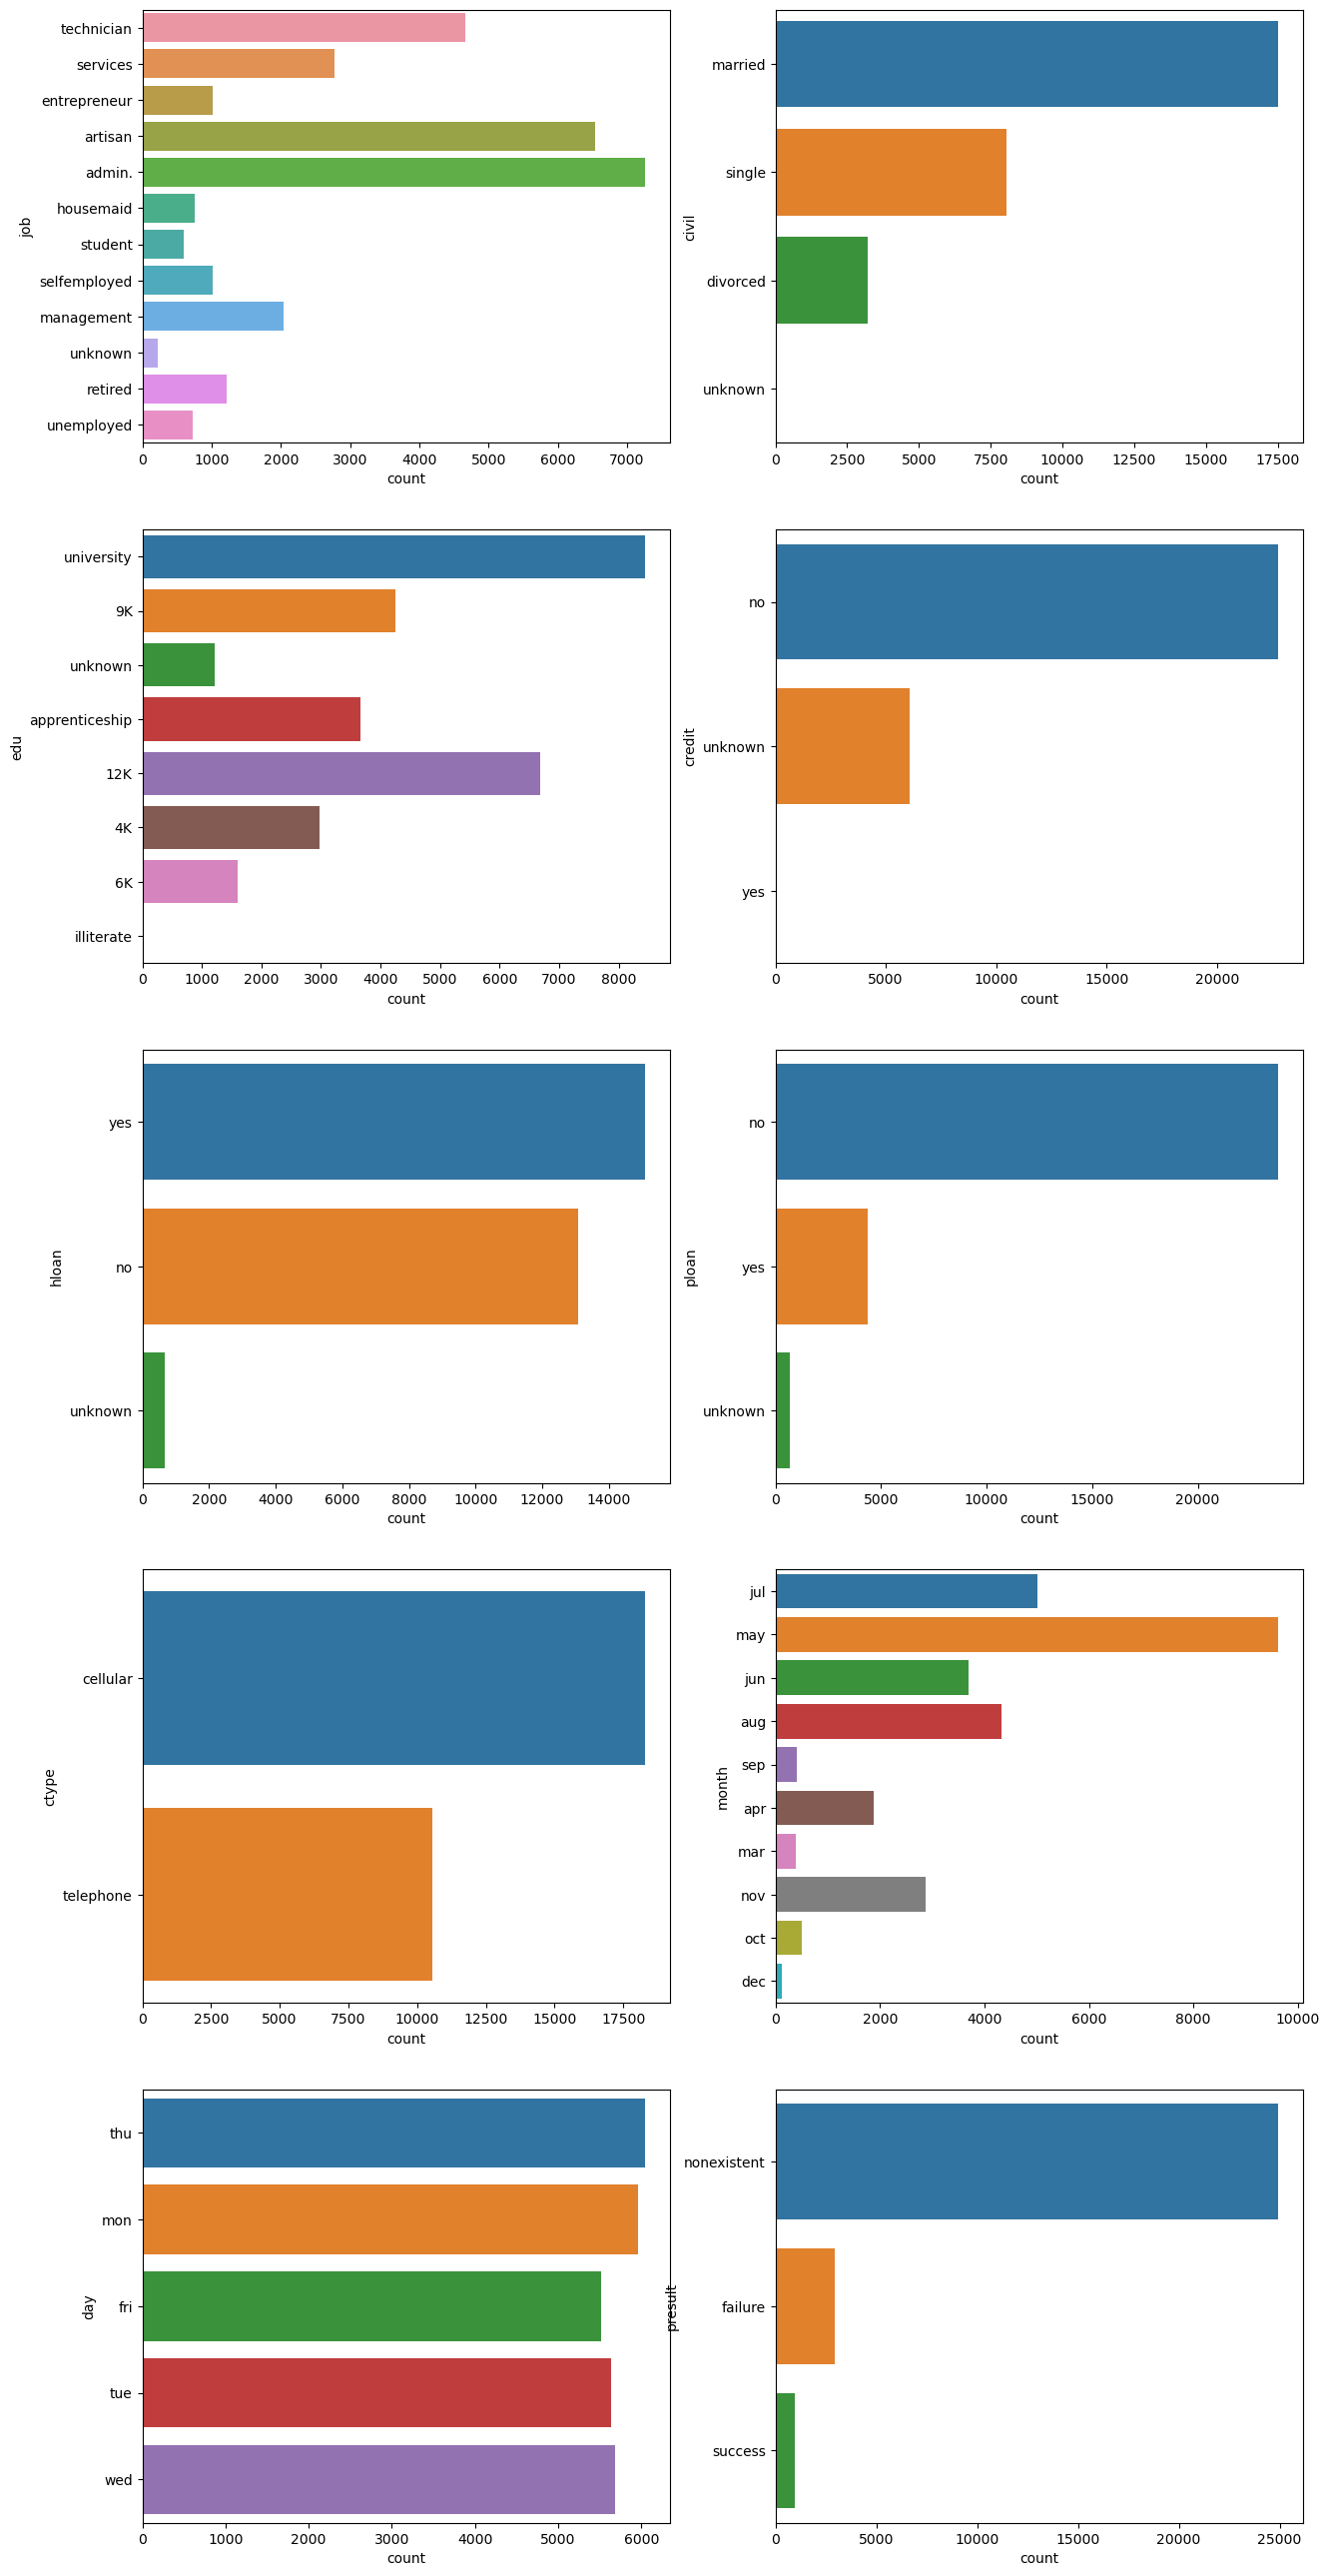

In [23]:
#Finding the variable distribution for both train and test datasets
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_vari in categorical_variables:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_vari,data=df_train)
    #plt.xlabel(categorical_variables)
    plotnumber+=1
plt.show()

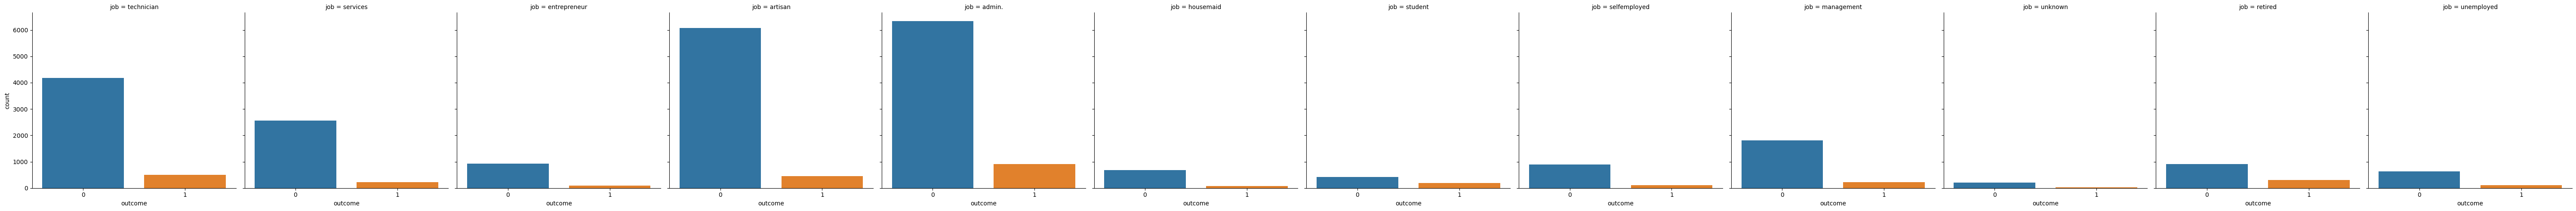

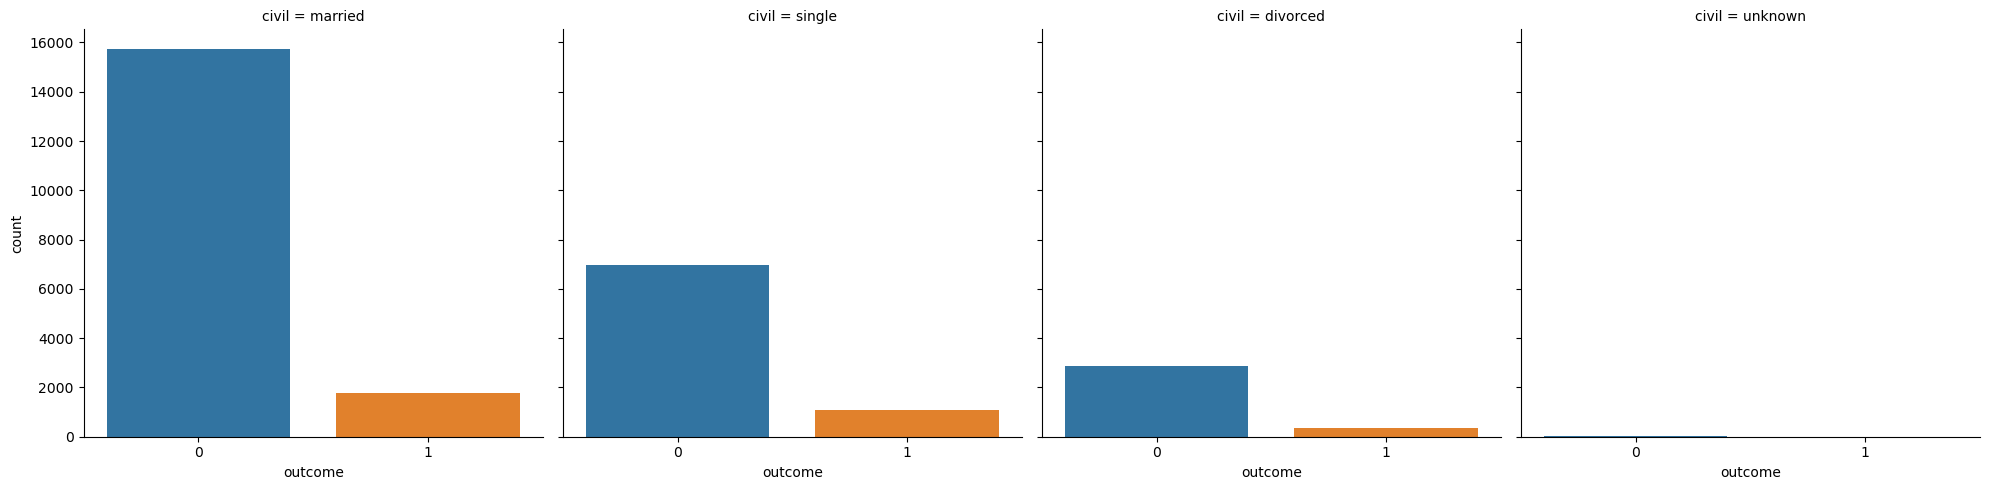

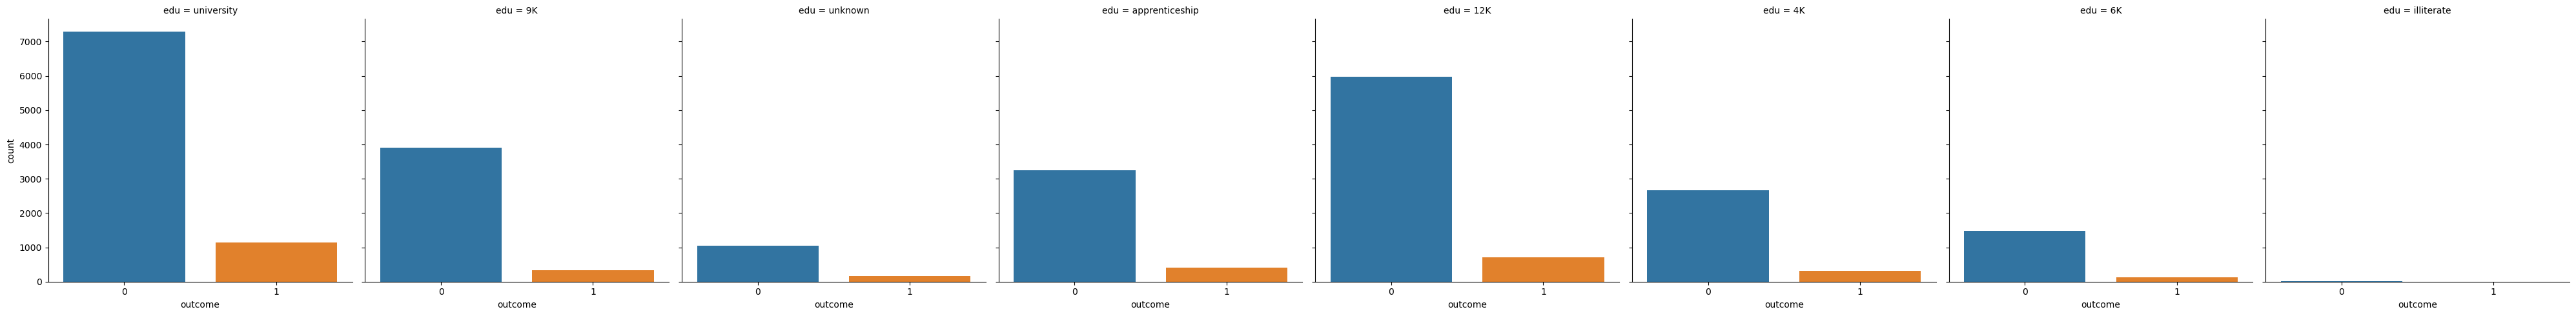

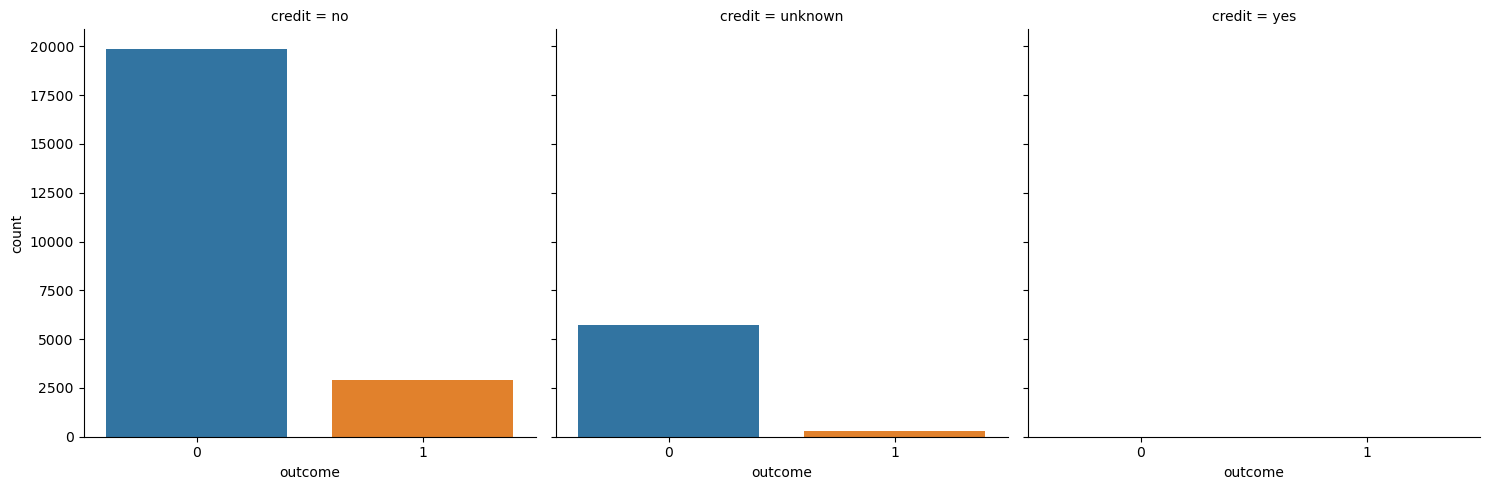

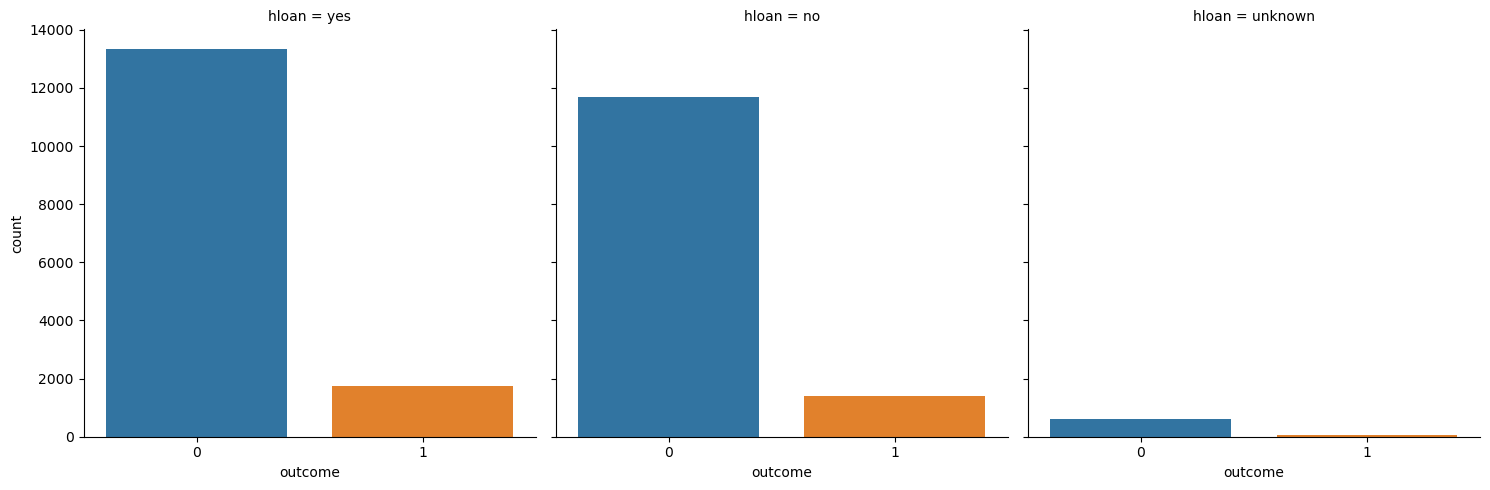

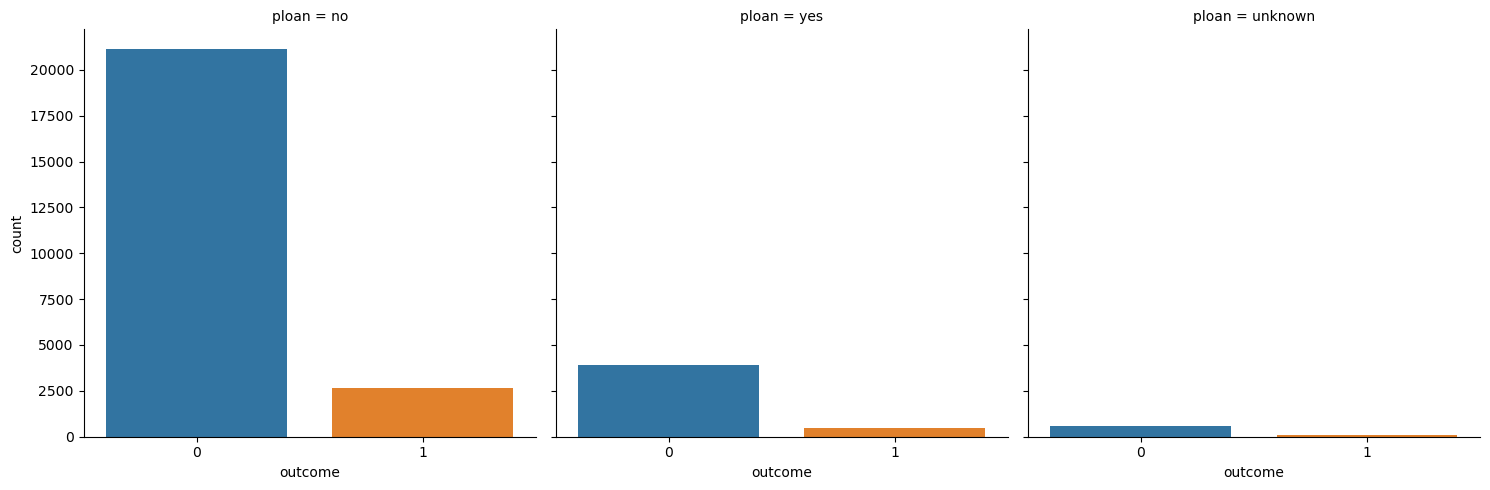

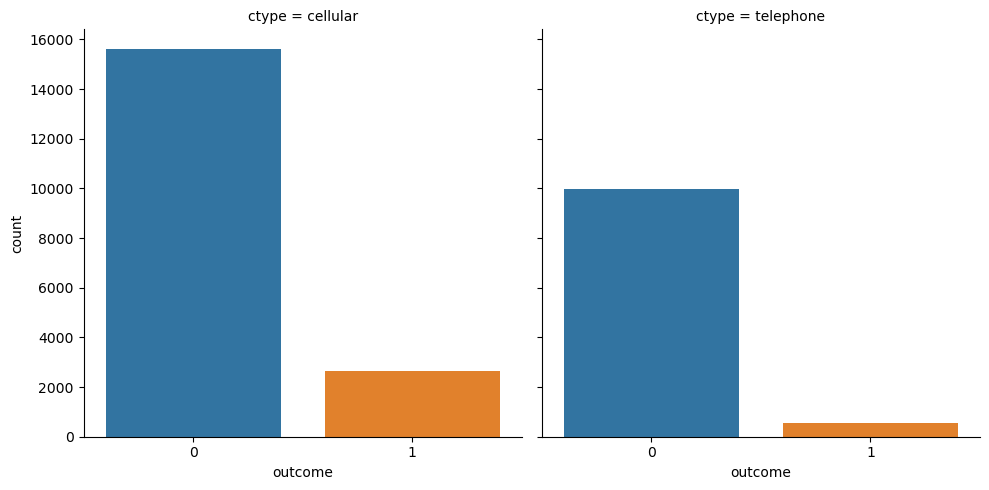

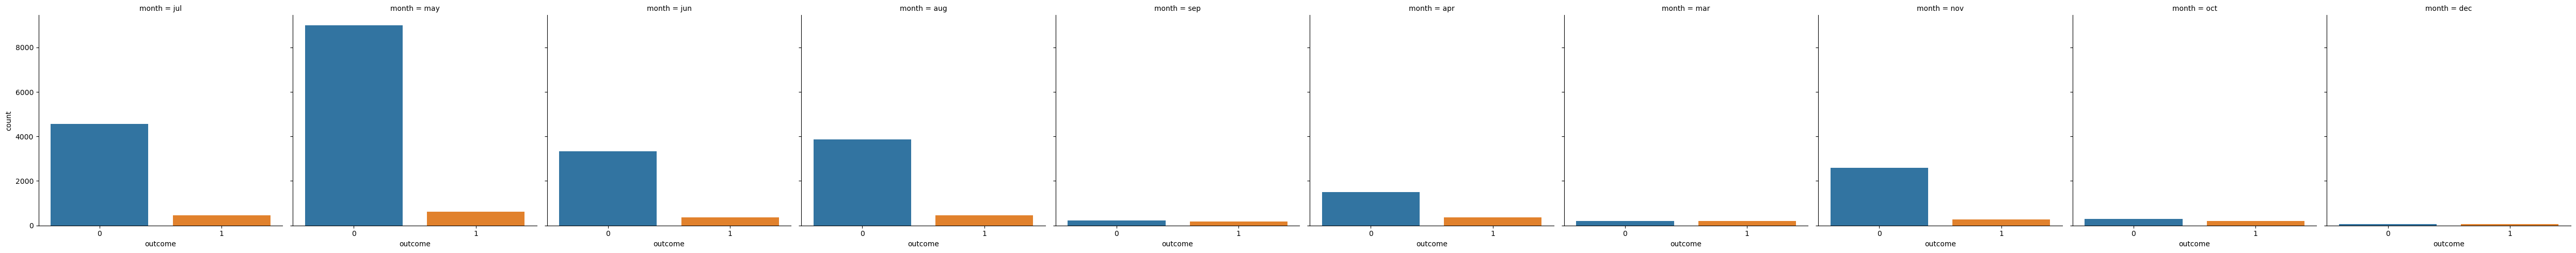

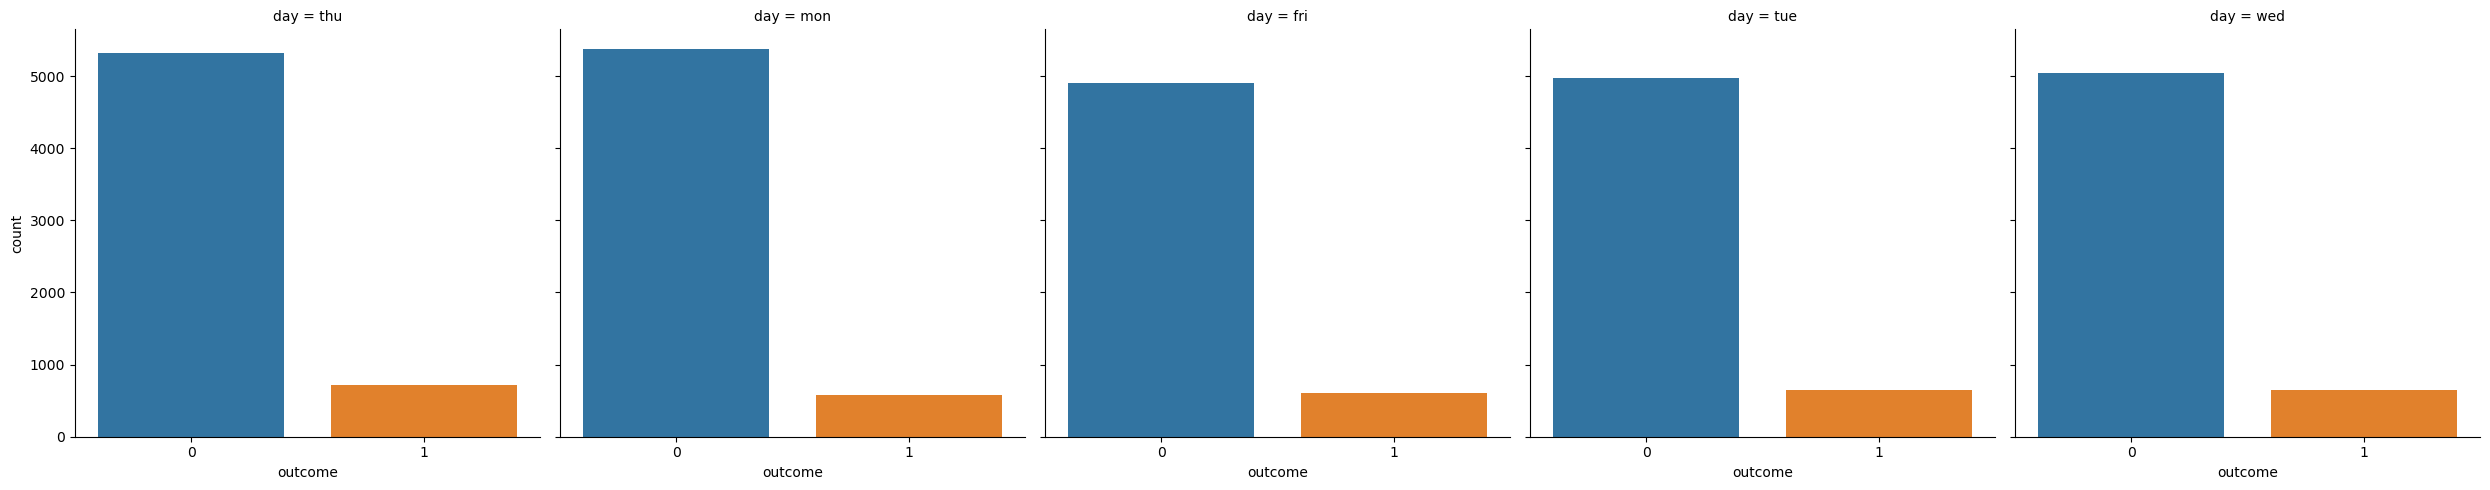

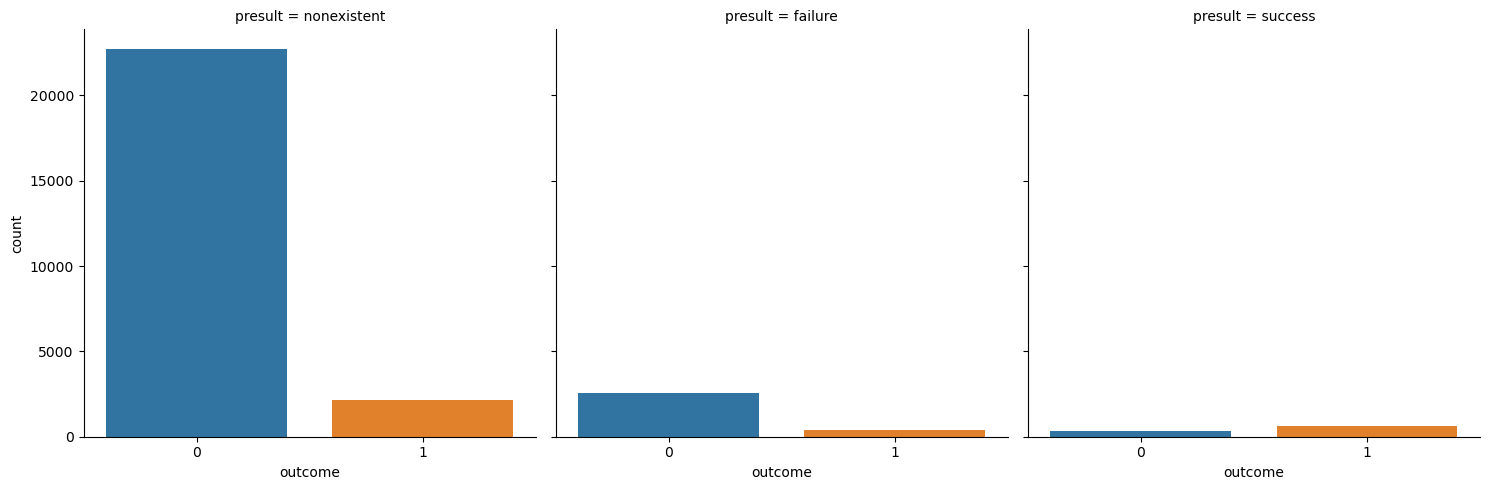

In [24]:
#check target label split over categorical variables for train and test
#Find out the relationship between categorical variable and dependent variable
for categorical_variables in categorical_variables:
 sns.catplot(x='outcome', col=categorical_variables, kind='count', data= df_train)
plt.show()

In [25]:
#Check target label split over categorical features and find the count for training dataset
#for categorical_feature in categorical_variables:
    #print(df_train.groupby(['outcome',categorical_feature]).size())

In [26]:
#Exploring and analyzing the numerical variables
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes != 'O') & (feature not in ['outcome']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  9


,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees
0,32,7,999,0,1.4,93.918,-42.7,4.968,5228.1
1,27,2,999,0,1.1,93.994,-36.4,4.857,5191.0
2,57,4,999,0,-1.8,92.893,-46.2,1.313,5099.1
3,42,1,999,0,1.1,93.994,-36.4,4.858,5191.0
4,49,1,999,0,1.4,94.465,-41.8,4.958,5228.1


In [27]:
#Finding discrete numerical variables
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [28]:
#Identifying continuous numerical variables
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['outcome']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


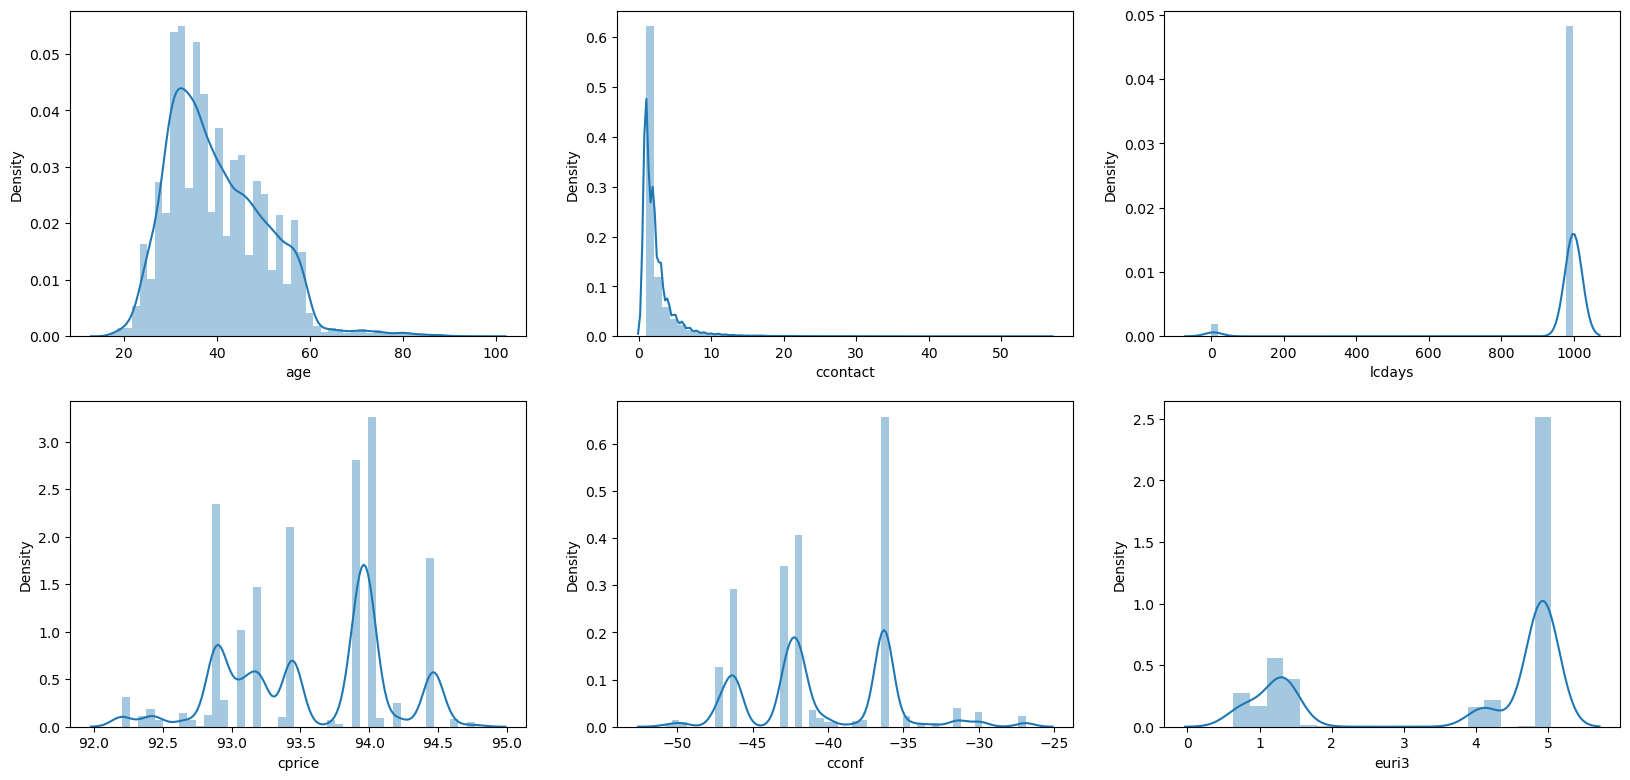

In [29]:
#Distribution of the continuous numerical variables
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

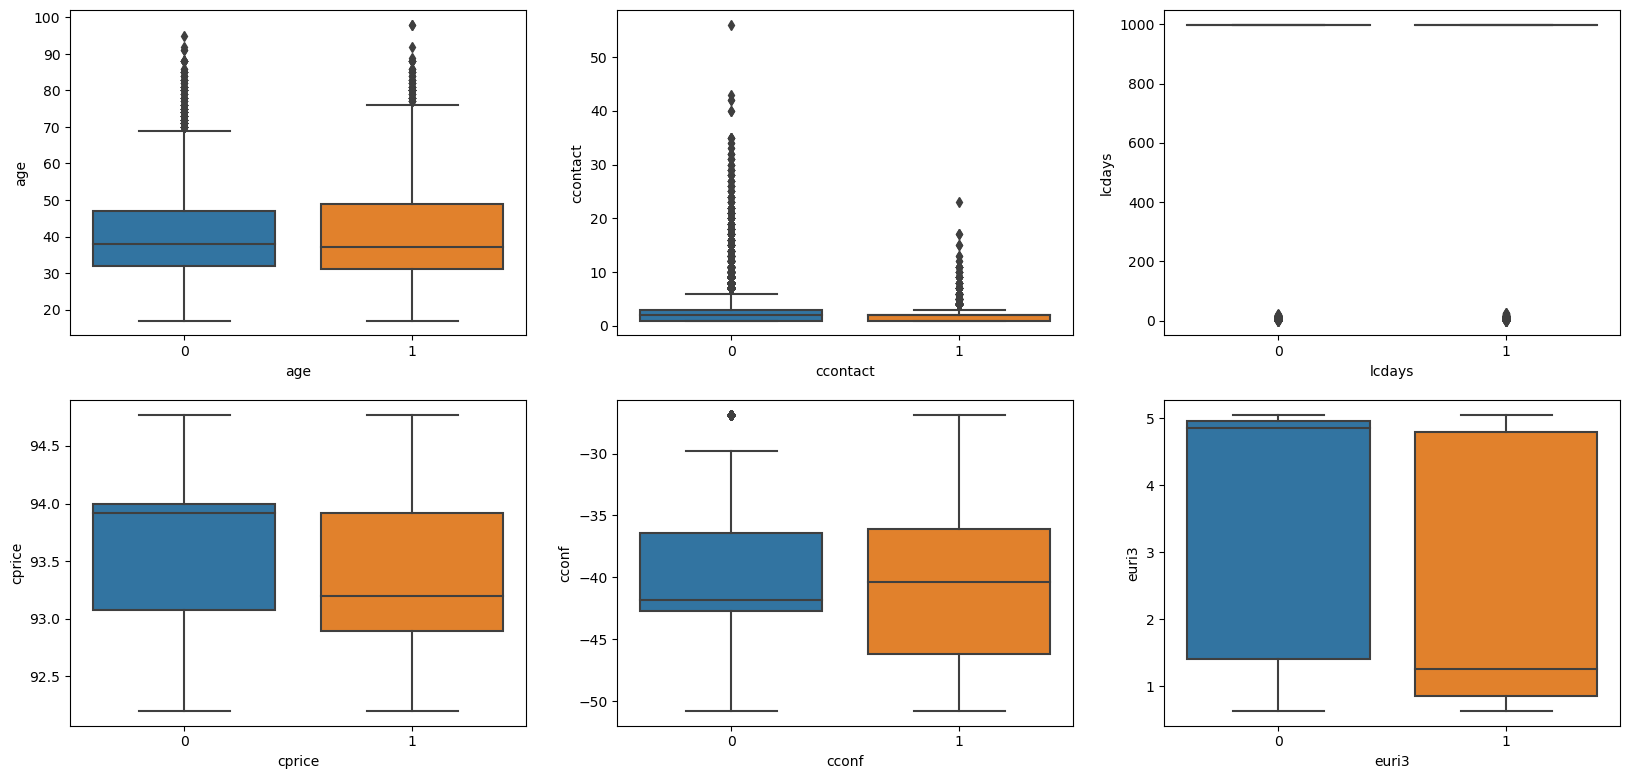

In [30]:
#boxplot to show target distribution with respect to numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="outcome", y= df_train[feature], data=df_train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

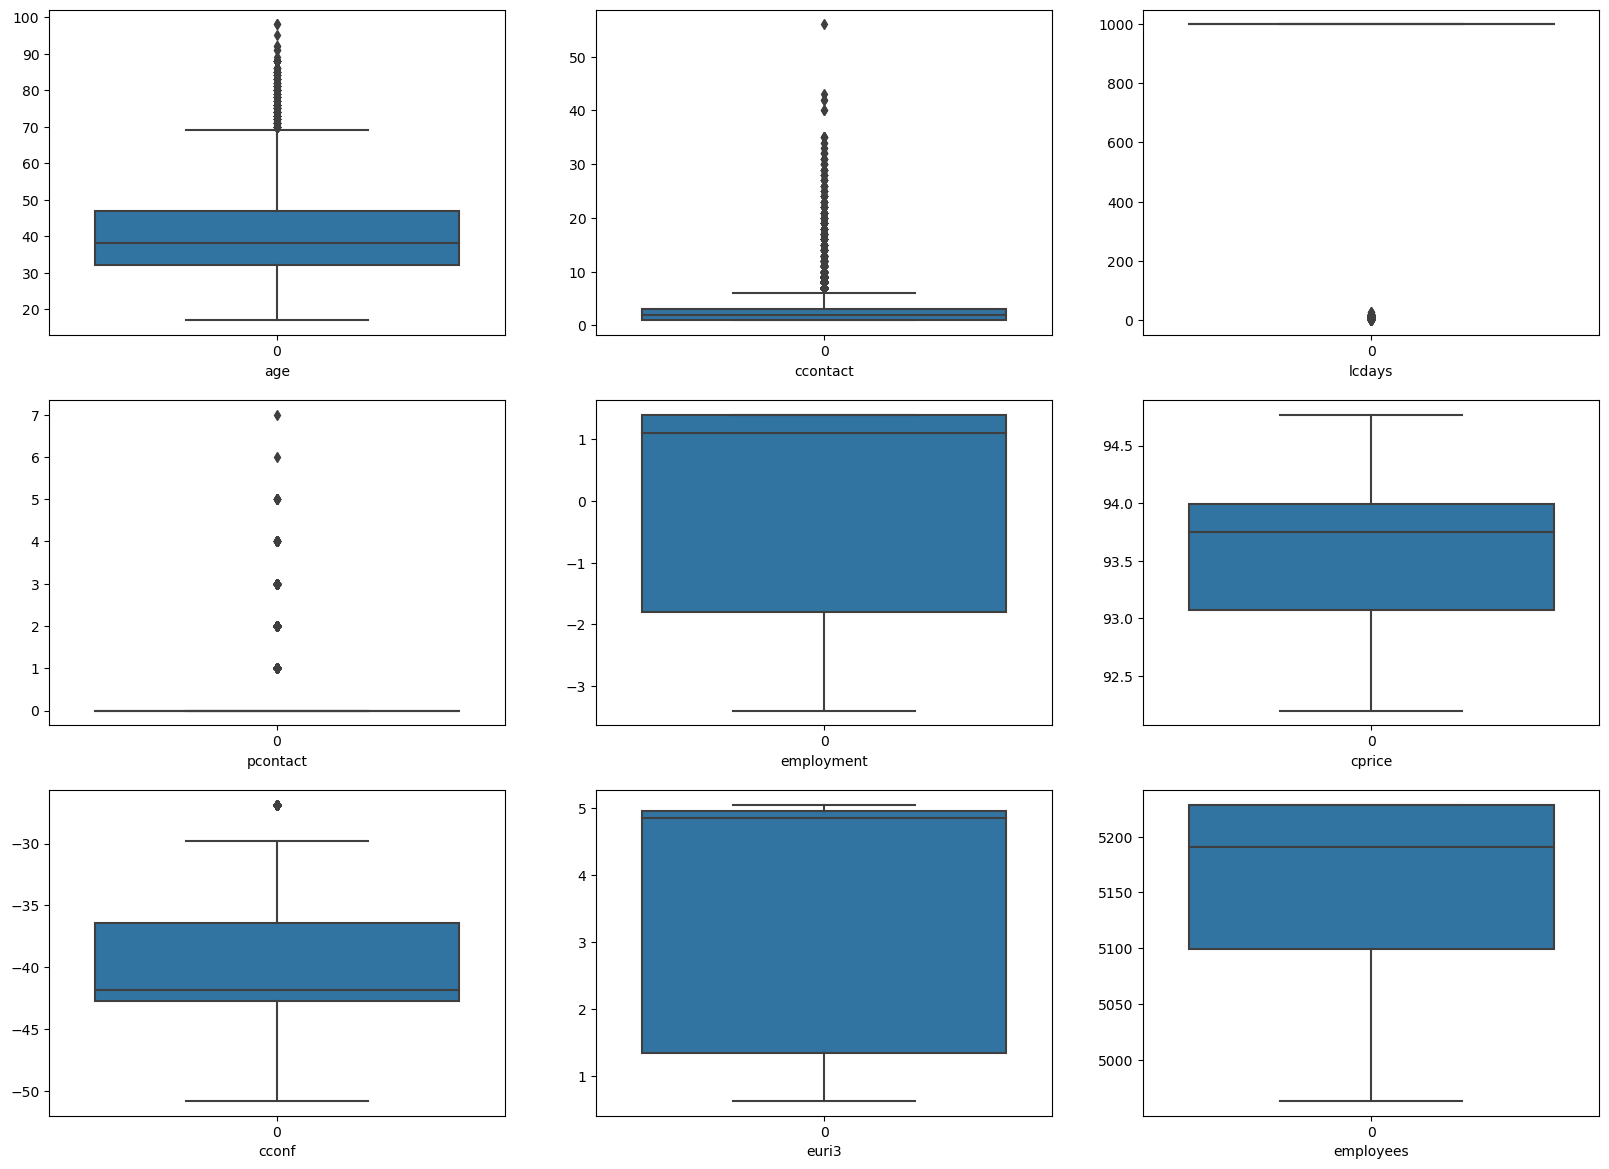

In [31]:
#Identifying outliers on numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [32]:
#df_train_num = rescale(df_train)

df_numericals = df_train[numerical_variables]
df_numericals.head()

,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees
0,32,7,999,0,1.4,93.918,-42.7,4.968,5228.1
1,27,2,999,0,1.1,93.994,-36.4,4.857,5191.0
2,57,4,999,0,-1.8,92.893,-46.2,1.313,5099.1
3,42,1,999,0,1.1,93.994,-36.4,4.858,5191.0
4,49,1,999,0,1.4,94.465,-41.8,4.958,5228.1


<AxesSubplot:>

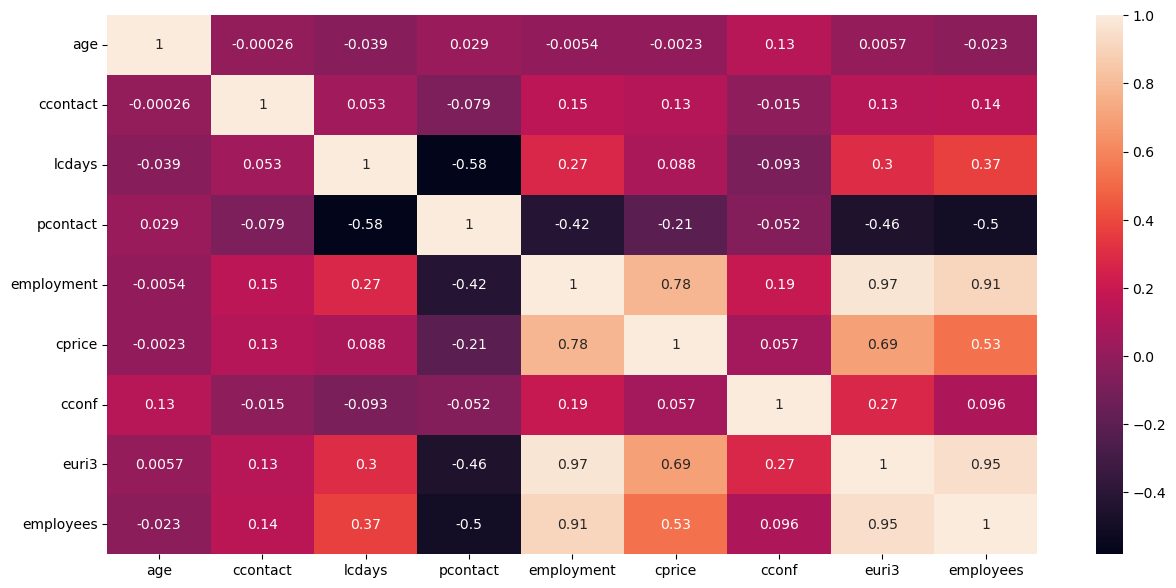

In [33]:
#Finding the correlation between numerical features
## Checking for correlation
cor_mat=df_numericals.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

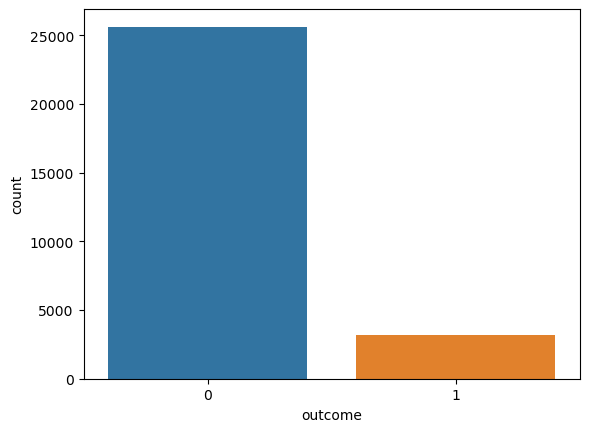

In [34]:
#Checking if the dataset is balanced with respect to the target variable
sns.countplot(x='outcome',data=df_train)
plt.show()

In [35]:
df_train['outcome'].groupby(df_train['outcome']).count()

outcome
0    25622
1     3209
Name: outcome, dtype: int64

## Data Pre-processing

In [36]:
#combining the train and test dataframes for pre-processing
df = pd.concat([df_train,df_test], axis = 0)
df.shape

(41188, 20)

In [37]:
#creating a list of numerical and categorical variables respectively
numerical_variables =  list(df.select_dtypes(include=['int64','float64']).drop('outcome', axis=1).columns) #listing all the numerical variables

categorical_variables =  list(df.select_dtypes(include=['object']).columns) #listing all the categorical variables

In [38]:
#creating a new variable and assigning the target column to it
target_train = df_train['outcome'] 
target_train.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [39]:
#creating a separate dataframe for the numerical variables
df_numericals = df[numerical_variables]
df_numericals.head()

,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees
0,32,7,999,0,1.4,93.918,-42.7,4.968,5228.1
1,27,2,999,0,1.1,93.994,-36.4,4.857,5191.0
2,57,4,999,0,-1.8,92.893,-46.2,1.313,5099.1
3,42,1,999,0,1.1,93.994,-36.4,4.858,5191.0
4,49,1,999,0,1.4,94.465,-41.8,4.958,5228.1


In [40]:
#calculating the standard deviation of the numerical variables to find the variables with highest and lowest variance
df_numericals.std()

age            10.421250
ccontact        2.770014
lcdays        186.910907
pcontact        0.494901
employment      1.570960
cprice          0.578840
cconf           4.628198
euri3           1.734447
employees      72.251528
dtype: float64

In [41]:
# Droping variables with variance less than 1
df_numericals = df_numericals.drop(df_numericals.std()[df_numericals.std()<1].index, axis = 1) 
df_numericals.head()

,age,ccontact,lcdays,employment,cconf,euri3,employees
0,32,7,999,1.4,-42.7,4.968,5228.1
1,27,2,999,1.1,-36.4,4.857,5191.0
2,57,4,999,-1.8,-46.2,1.313,5099.1
3,42,1,999,1.1,-36.4,4.858,5191.0
4,49,1,999,1.4,-41.8,4.958,5228.1


In [42]:
# create a new dummy variable based on the lcdays column
df_numericals['lcdays_new_var'] = (df_numericals['lcdays'] >= 0) & (df_numericals['lcdays'] <= 27)
# replace True/False values with 1/0
df_numericals['lcdays_new_var'] = df_numericals['lcdays_new_var'].astype(int)
df_numericals['lcdays_new_var'][11]

11    1
11    0
Name: lcdays_new_var, dtype: int64

In [43]:
df_numericals.head()

,age,ccontact,lcdays,employment,cconf,euri3,employees,lcdays_new_var
0,32,7,999,1.4,-42.7,4.968,5228.1,0
1,27,2,999,1.1,-36.4,4.857,5191.0,0
2,57,4,999,-1.8,-46.2,1.313,5099.1,0
3,42,1,999,1.1,-36.4,4.858,5191.0,0
4,49,1,999,1.4,-41.8,4.958,5228.1,0


In [44]:
#creating a new dataframe for the categorical variables
df_categoricals = df[categorical_variables]
df_categoricals

,job,civil,edu,credit,hloan,ploan,ctype,month,day,presult
0,technician,married,university,no,yes,no,cellular,jul,thu,nonexistent
1,services,single,9K,no,no,no,telephone,may,mon,nonexistent
2,services,divorced,unknown,no,no,no,cellular,may,fri,nonexistent
3,entrepreneur,married,university,no,no,no,telephone,may,mon,nonexistent
4,technician,married,apprenticeship,no,no,yes,telephone,jun,thu,nonexistent
...,...,...,...,...,...,...,...,...,...,...
12352,housemaid,divorced,university,no,no,no,cellular,nov,wed,nonexistent
12353,admin.,married,university,no,yes,no,cellular,nov,wed,nonexistent
12354,retired,married,university,no,yes,no,cellular,nov,thu,success
12355,retired,married,university,no,no,no,cellular,nov,thu,success


## Model Fitting 

In [45]:
#combining and assigning the numerical and categorical dataframes in to X and the target variable to y_train
X = pd.concat([df_numericals, df_categoricals], axis = 1)
y_train = target_train

In [46]:
X.columns

Index(['age', 'ccontact', 'lcdays', 'employment', 'cconf', 'euri3',
       'employees', 'lcdays_new_var', 'job', 'civil', 'edu', 'credit', 'hloan',
       'ploan', 'ctype', 'month', 'day', 'presult'],
      dtype='object')

In [47]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
28826    0
28827    0
28828    0
28829    0
28830    0
Name: outcome, Length: 28831, dtype: int64

### **Splitting the data into Train and Test**

In [48]:
X.iloc[28825:28835,:]

,age,ccontact,lcdays,employment,cconf,euri3,employees,lcdays_new_var,job,civil,edu,credit,hloan,ploan,ctype,month,day,presult
28825,29,7,999,1.1,-36.4,4.857,5191.0,0,selfemployed,married,9K,unknown,yes,no,telephone,may,fri,nonexistent
28826,45,1,999,-1.8,-46.2,1.250,5099.1,0,artisan,single,12K,no,no,no,cellular,may,fri,nonexistent
28827,33,2,999,1.4,-36.1,4.970,5228.1,0,technician,divorced,apprenticeship,no,no,no,cellular,aug,mon,nonexistent
28828,35,3,999,1.4,-42.7,4.963,5228.1,0,admin.,single,9K,no,yes,no,cellular,jul,fri,nonexistent
28829,27,1,999,1.4,-42.7,4.963,5228.1,0,technician,married,apprenticeship,no,yes,no,telephone,jul,thu,nonexistent
28830,40,1,999,1.4,-36.1,4.963,5228.1,0,admin.,married,university,no,yes,yes,cellular,aug,tue,nonexistent
0,45,1,999,1.1,-36.4,4.857,5191.0,0,services,married,9K,unknown,no,no,telephone,may,mon,nonexistent
1,41,1,999,1.1,-36.4,4.857,5191.0,0,artisan,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
2,41,1,999,1.1,-36.4,4.857,5191.0,0,artisan,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
3,54,1,999,1.1,-36.4,4.857,5191.0,0,retired,married,9K,unknown,yes,yes,telephone,may,mon,nonexistent


In [49]:
X_train=X.iloc[:28831,:]
X_test=X.iloc[28831:,:]
X_train.tail()

,age,ccontact,lcdays,employment,cconf,euri3,employees,lcdays_new_var,job,civil,edu,credit,hloan,ploan,ctype,month,day,presult
28826,45,1,999,-1.8,-46.2,1.250,5099.1,0,artisan,single,12K,no,no,no,cellular,may,fri,nonexistent
28827,33,2,999,1.4,-36.1,4.970,5228.1,0,technician,divorced,apprenticeship,no,no,no,cellular,aug,mon,nonexistent
28828,35,3,999,1.4,-42.7,4.963,5228.1,0,admin.,single,9K,no,yes,no,cellular,jul,fri,nonexistent
28829,27,1,999,1.4,-42.7,4.963,5228.1,0,technician,married,apprenticeship,no,yes,no,telephone,jul,thu,nonexistent
28830,40,1,999,1.4,-36.1,4.963,5228.1,0,admin.,married,university,no,yes,yes,cellular,aug,tue,nonexistent


In [50]:
X_test.head()

,age,ccontact,lcdays,employment,cconf,euri3,employees,lcdays_new_var,job,civil,edu,credit,hloan,ploan,ctype,month,day,presult
0,45,1,999,1.1,-36.4,4.857,5191.0,0,services,married,9K,unknown,no,no,telephone,may,mon,nonexistent
1,41,1,999,1.1,-36.4,4.857,5191.0,0,artisan,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
2,41,1,999,1.1,-36.4,4.857,5191.0,0,artisan,married,unknown,unknown,no,no,telephone,may,mon,nonexistent
3,54,1,999,1.1,-36.4,4.857,5191.0,0,retired,married,9K,unknown,yes,yes,telephone,may,mon,nonexistent
4,30,1,999,1.1,-36.4,4.857,5191.0,0,unemployed,married,12K,no,no,no,telephone,may,mon,nonexistent


### Assigning weights to classes to counter the imbalance in the data

In [51]:
# Calculate class frequencies
class_freq = np.bincount(y_train)
print("Class frequencies:", class_freq)


Class frequencies: [25622  3209]


In [52]:
# Calculate class weights
class_weights = len(y_train) / (2 * class_freq)
class_weights = dict(zip([0, 1], class_weights))
print("Class weights:", class_weights)

Class weights: {0: 0.5626219654983998, 1: 4.492209411031474}


### Using CatBoostClassifier() to fit the model

In [53]:
#pip install CatBoost

In [54]:
#importing the CatBoostClassifier() library
from catboost import CatBoostClassifier

In [55]:
#assigning an instance for the CatBoostClassifier()
cat_model = CatBoostClassifier(iterations=100, cat_features=categorical_variables, class_weights=class_weights, verbose=False)

In [56]:
#fitting the model 
cat_model.fit(X_train, y_train)

### Using RandomSearchCV() for model selection

In [57]:
#importing necessary libraries

from scipy.stats import randint as sp_randint

# Define the hyperparameter ranges for the randomized search

params = {
    'learning_rate': [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2],
    'depth': sp_randint(4, 10),
    'iterations': sp_randint(100, 1000),
    'l2_leaf_reg': sp_randint(1, 10),
    'subsample': [0.5, 0.6, 0.7, 0.8],
    'colsample_bylevel': [0.5, 0.6, 0.7, 0.8]
}

In [58]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(cat_model,
            param_distributions=params,
            cv=5, n_iter=12,
            scoring = 'roc_auc',n_jobs = 1,
            verbose = 0, 
            return_train_score = True,
            random_state=42)

In [59]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7946afd28650>,
                   n_iter=12, n_jobs=1,
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8],
                                        'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7946afd0e950>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7946afd0edd0>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7946afd33110>,
                                        'learning_rate': [0.01, 0.05, 0.06,
                                                          0.07, 0.08, 0.09, 0.1,
                                                          0.15, 0.2],
                                        'subsample': [0.5, 0.6, 0.7, 0.8]},
                   rand

In [60]:
# Print the best hyperparameters and AUC score
print("Best parameters: ", random_cv.best_params_)
print("Best AUC score: ", random_cv.best_score_)

Best parameters:  {'colsample_bylevel': 0.8, 'depth': 4, 'iterations': 230, 'l2_leaf_reg': 5, 'learning_rate': 0.06, 'subsample': 0.7}
Best AUC score:  0.7970355126932451


In [61]:
#using the best parameters to create an instance for the model
cat_model = CatBoostClassifier(cat_features=categorical_variables, class_weights=class_weights, verbose=False, colsample_bylevel= 0.5, depth= 5, iterations=443, l2_leaf_reg=6, learning_rate=0.05, subsample=0.8)

In [62]:
#using the best parameter to fit the model again
cat_model.fit(X_train, y_train)

In [63]:
#predicting the probabilities of the outcome
y_pred_cat = cat_model.predict_proba(X_test)

In [64]:
y_pred_cat[:,1]

array([0.18200287, 0.18570504, 0.18570504, ..., 0.95391648, 0.95172406,
       0.80154653])

## Plotting the Feature Importance Graph

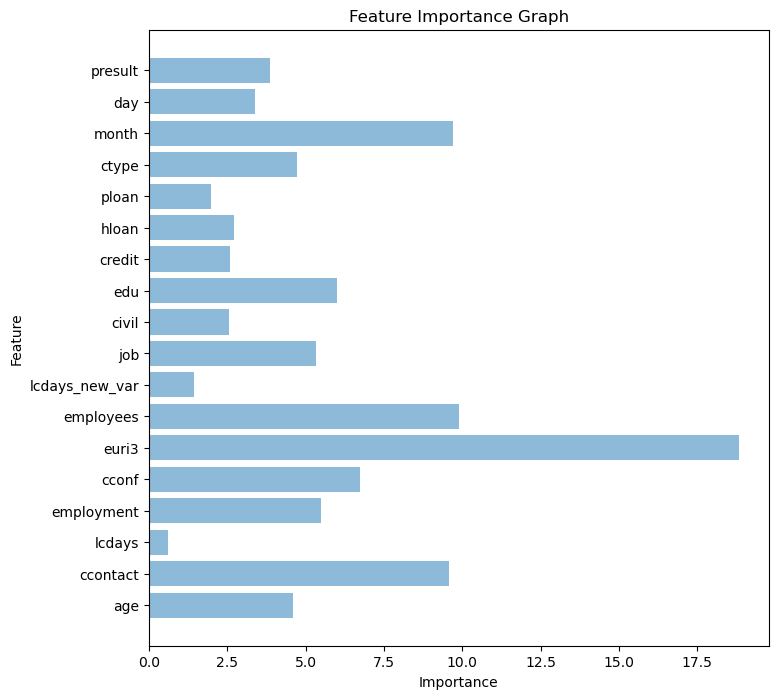

In [65]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = cat_model.get_feature_importance()
objects = cat_model.feature_names_
y_pos = np.arange(len(objects))
performance = feature_importance

plt.figure(figsize=(8, 8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Graph')
plt.show()

## Creating a dataframe to save the test id's and the model prediction probabilities

In [66]:
# creating a dataframe with test id and predicted outcomes

results = pd.DataFrame({'id': id_test, 'outcome': y_pred_cat[:,1]})

# save the dataframe as a CSV file
results.to_csv('submission_cat_model1.csv', index=False)

*********************************************************************************************************************************************